**`1. USING ONLY LSTM`**

**Importing the necessary Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

**Fetching data**

In [3]:
data = yf.download('MSFT', start='2018-01-01', end='2024-03-31')
df = data['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


**Feature Scaling**

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(df)

**Creating the dataset**

In [5]:
def create_dataset(df, time_steps=1):
    x, y = [], []
    for i in range(len(df) - time_steps):
        data_steps = df[i:(i + time_steps), 0]
        x.append(data_steps)
        y.append(df[i + time_steps, 0])
    return np.array(x), np.array(y)

**Splitting data into train and test sets**

In [6]:
time_steps = 10
x, y = create_dataset(scaled_dataset, time_steps)

**Creating training and testing datasets**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Reshaping for LSTM input**

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Building the LSTM Model**

In [9]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Training the model**

In [10]:
lstm_model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0507
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0033
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 16/50
39/39 ━

In [11]:
y_pred_lstm = lstm_model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


**Reshape y_pred_lstm to be 2D for inverse transformation**

In [12]:
y_pred_lstm = y_pred_lstm.reshape(-1, 1)

**Inverse transform predictions and actual values to original scale**

In [13]:
y_pred_lstm_inverse = scaler.inverse_transform(y_pred_lstm)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

**Evaluating LSTM model performance**

In [14]:
mse_lstm = mean_squared_error(y_test_inverse, y_pred_lstm_inverse)
mae_lstm = mean_absolute_error(y_test_inverse, y_pred_lstm_inverse)

In [15]:
print(f'LSTM Mean Squared Error: {mse_lstm:.4f}')
print(f'LSTM Mean Absolute Error: {mae_lstm:.4f}')

LSTM Mean Squared Error: 53.2530
LSTM Mean Absolute Error: 5.1422


**Plotting the results**

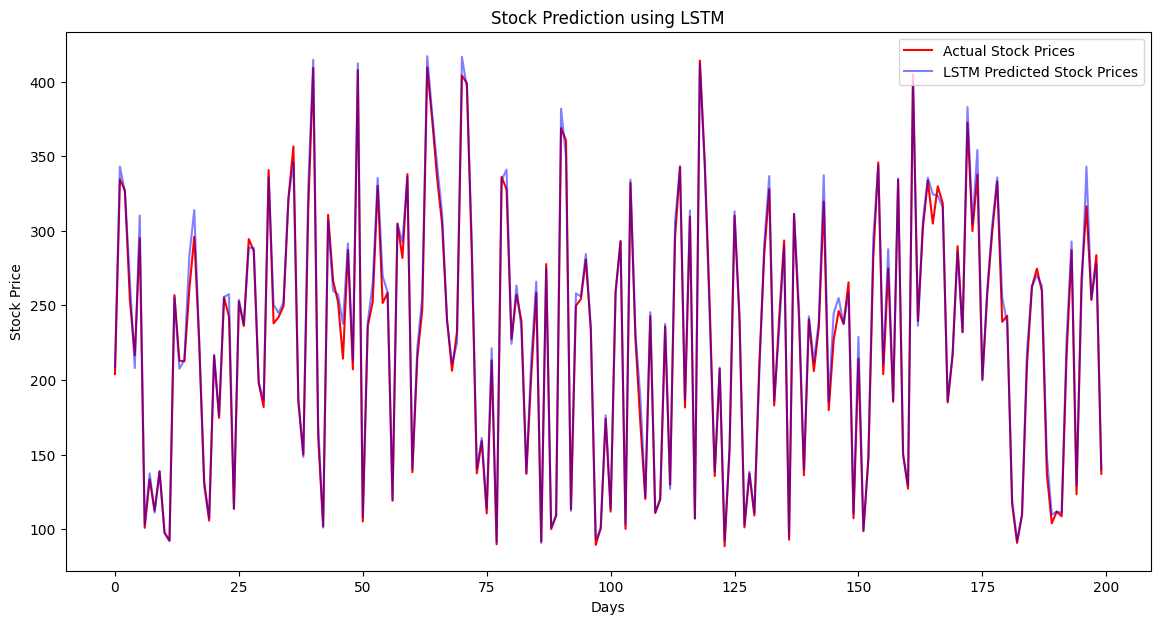

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse[-200:], label='Actual Stock Prices', color='red')
plt.plot(y_pred_lstm_inverse[-200:], label='LSTM Predicted Stock Prices', color='blue', alpha=0.5)
plt.title(f'Stock Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### **`1. USING LSTM+MLP`**

**Preparing the data for MLP model**

In [17]:
x_train_mlp = x_train.reshape(x_train.shape[0], x_train.shape[1])
x_test_mlp = x_test.reshape(x_test.shape[0], x_test.shape[1])

**Building the MLP model**

In [18]:
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(x_train_mlp.shape[1],)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1))
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fit the MLP model
**Training the MLP model**

In [19]:
mlp_model.fit(x_train_mlp, y_train, epochs=50, batch_size=32)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0066
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3259e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8244e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5804e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3922e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0483e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1849e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2843e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3353e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3276e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8060e-04
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7275e-04
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2165e-04
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9814e-04
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━

**Make predictions with MLP model**

In [20]:
y_pred_mlp = mlp_model.predict(x_test_mlp)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


**Inverse transform predictions from MLP to original scale**

In [21]:
y_pred_mlp_inverse = scaler.inverse_transform(y_pred_mlp)

**Combine predictions from both models for final prediction**

In [22]:
y_pred_combined = (y_pred_lstm_inverse + y_pred_mlp_inverse) / 2

**Evaluating combined predictions performance**

In [23]:
mse_combined = mean_squared_error(y_test_inverse, y_pred_combined)
mae_combined = mean_absolute_error(y_test_inverse, y_pred_combined)

print(f'Combined Model Mean Squared Error: {mse_combined:.4f}')
print(f'Combined Model Mean Absolute Error: {mae_combined:.4f}')

Combined Model Mean Squared Error: 35.6455
Combined Model Mean Absolute Error: 4.2326


**Plotting the results**

---



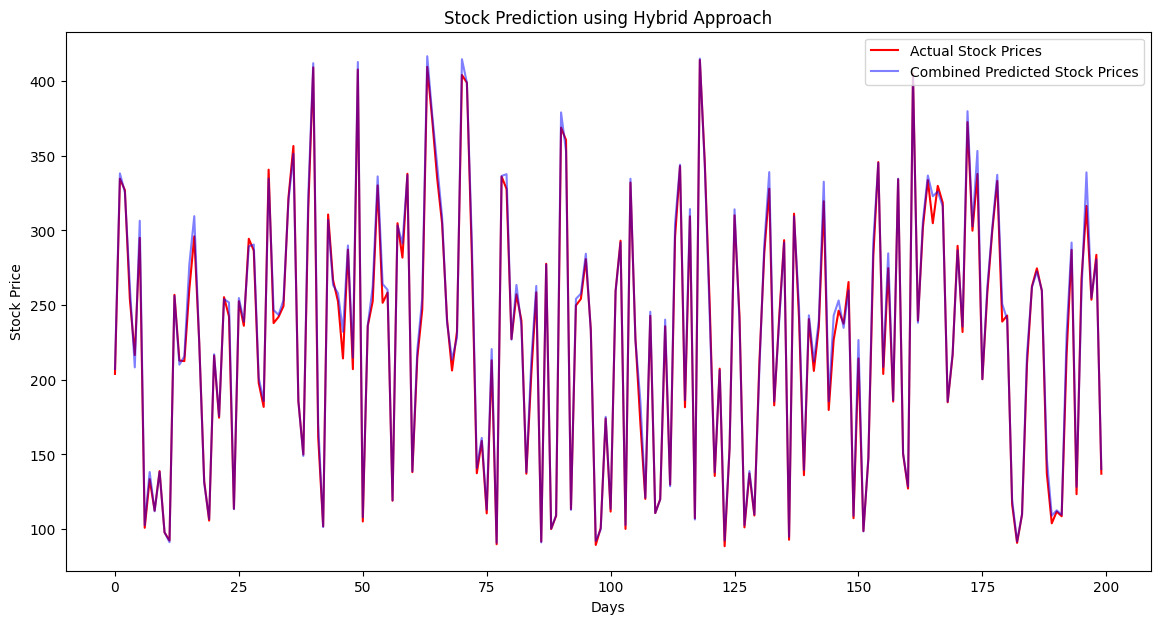

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse[-200:], label='Actual Stock Prices', color='red')
plt.plot(y_pred_combined[-200:], label='Combined Predicted Stock Prices', color='blue', alpha=0.5)
plt.title(f'Stock Prediction using Hybrid Approach')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()